In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs 
import pandas as pd 
import numpy as np
%matplotlib inline

In [7]:
# Generate isotropic Gaussian blobs for clustering. 

# The total number of points equally divided among clusters. 

# The number of features for each sample.

In [8]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=23)

In [9]:
X.shape

(1000, 2)

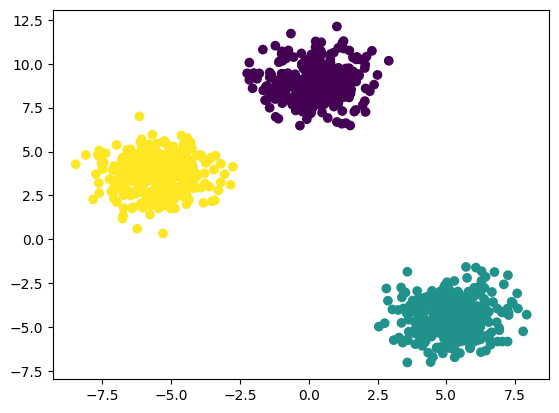

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)

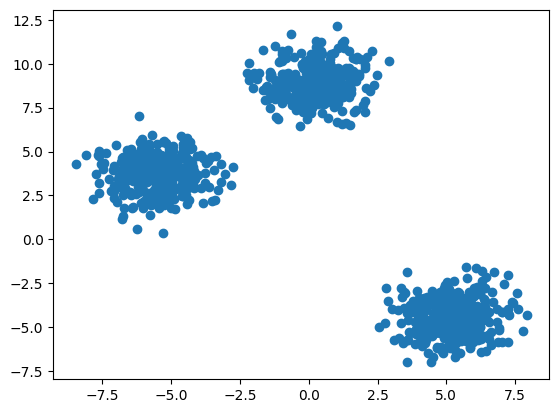

In [11]:
plt.scatter(X[:,0],X[:,1])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [14]:
## Elbow method to select the K value ... 

from sklearn.cluster import KMeans

In [15]:
KMeans(n_clusters=8,init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')

KMeans()

In [16]:
# Generate sample data
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

In [17]:
# List to store sum of squared errors for each k
sse = []

# Iterate through different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=0).fit(X_train)
    sse.append(kmeans.inertia_)



In [18]:
sse

[34827.57682552022,
 7935.437286145416,
 1319.2730531585607,
 1171.4379638359776,
 991.9047984051342,
 899.2440371022012,
 760.7634149488476,
 668.9429787076369,
 582.4811262975479,
 534.1476077587997]

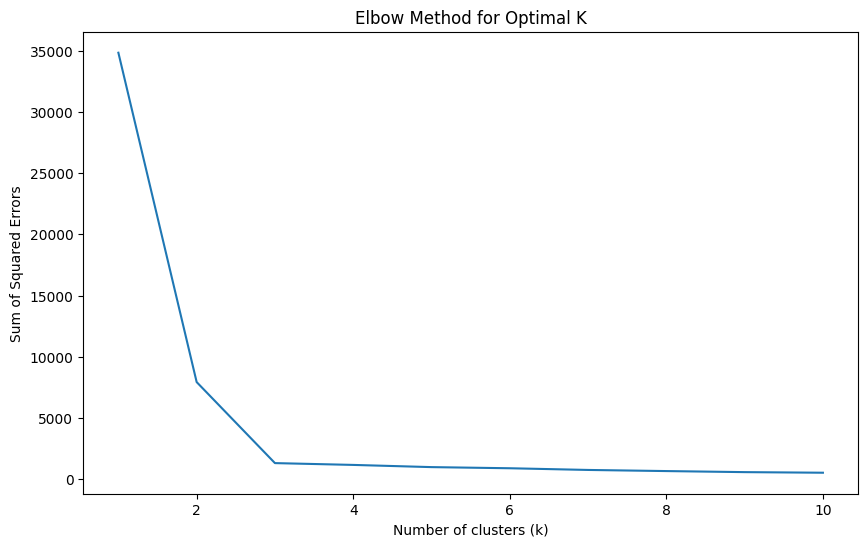

In [19]:
# Plot the sum of squared errors for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal K')
plt.show()

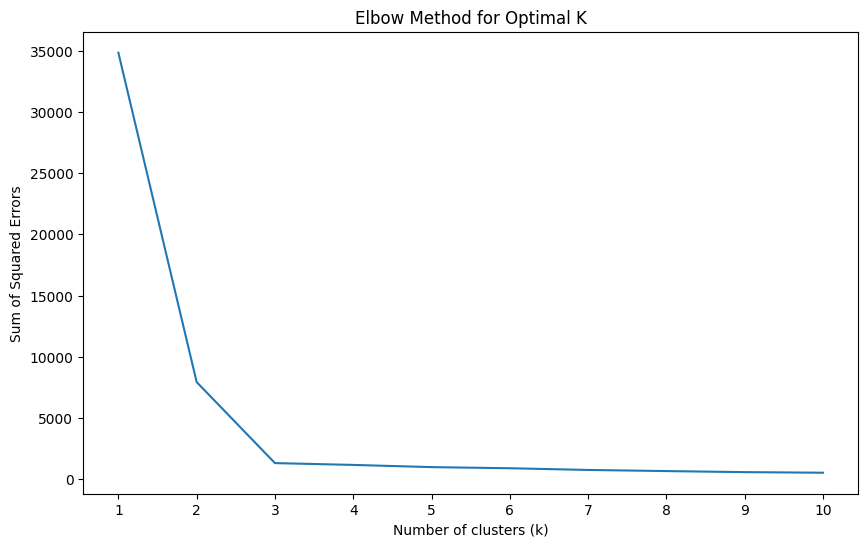

In [20]:
# Plot the sum of squared errors for each k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal K')
plt.show()

In [21]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [22]:
y_labels = kmeans.fit_predict(X_train)

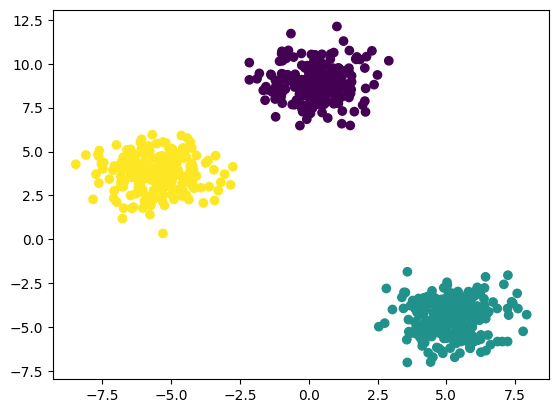

In [23]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [24]:
y_test_labels = kmeans.predict(X_test)

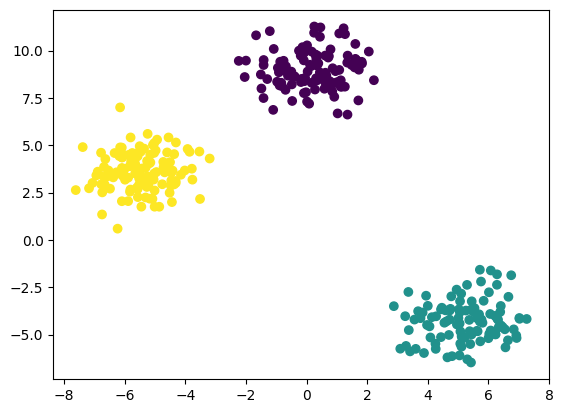

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [26]:
## knee Locator 
##The knee locator is a device that is used to locate the knee joint. It is a small, handheld device that is placed on the knee and emits


In [27]:
from kneed import KneeLocator

In [28]:
kl =KneeLocator(range(1,11),sse,curve='convex',direction='decreasing') # concave for increased

In [29]:
kl.elbow

3

In [30]:
## Performace Metrics 

## Selhoutte score 
## s(i) = (b(i) - a(i)) / max(a(i), b(i))
from sklearn.metrics import silhouette_score

In [31]:
silhouette_coefficients =[]
for k in range(2,11):
    # Fit K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++').fit(X_train)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(silhouette_avg)

In [32]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4723297879921876,
 0.33367872107343594,
 0.32758752735600283,
 0.33049705268923796,
 0.3233874690312625,
 0.32630032779404855]

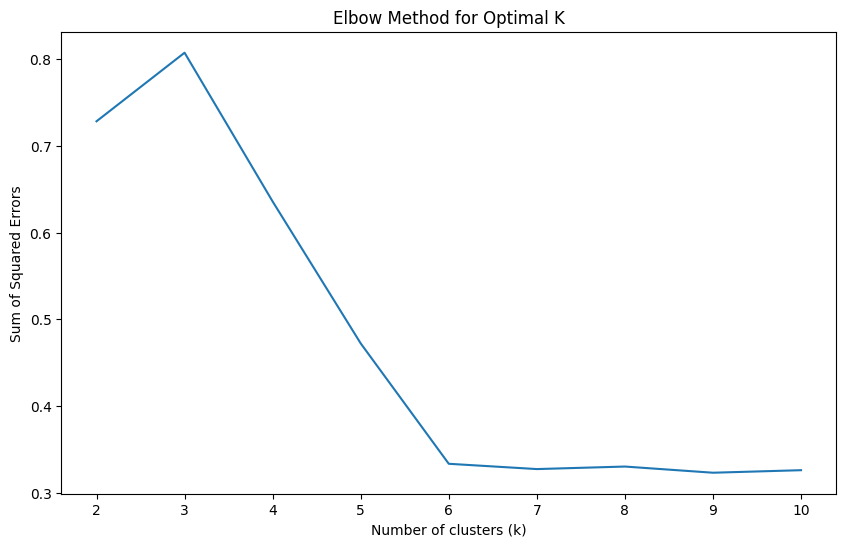

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal K')
plt.show()

In [34]:
silhouette_coefficients =[]
for k in range(2,11):
    # Fit K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42,init='k-means++').fit(X_train)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(silhouette_avg)
    


In [35]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4723297879921876,
 0.33367872107343594,
 0.32758752735600283,
 0.33049705268923796,
 0.3233874690312625,
 0.32630032779404855]

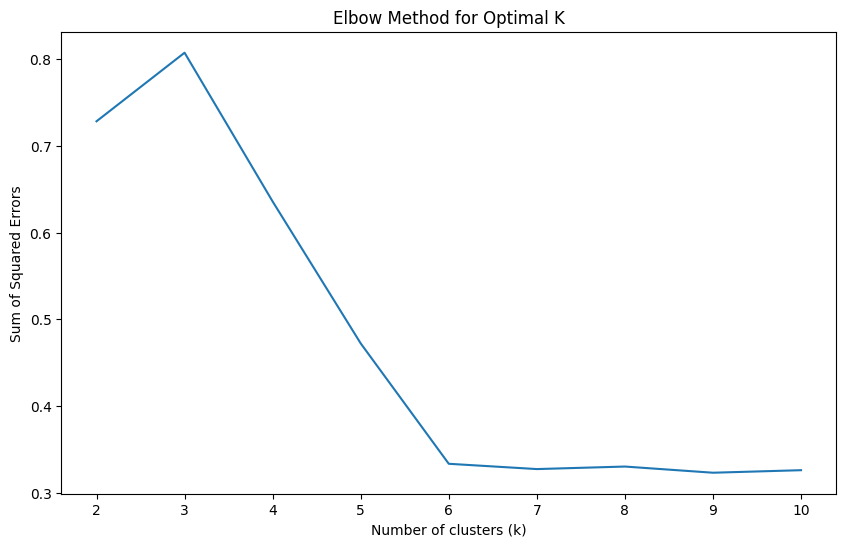

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal K')
plt.show()

In [37]:
# Hierarichal Clustering Implementation 

In [38]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets

In [39]:
load_diabetes = datasets.load_diabetes()
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [40]:
## Import IRIS Dataset 
iris_data = pd.DataFrame(iris.data)
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
iris_data.columns = iris.feature_names
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()

In [44]:
X_scaler =scaler.fit_transform(iris_data)
X_scaler

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca = PCA(n_components=2)
pca_scaler = pca.fit_transform(X_scaler)
pca_scaler

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

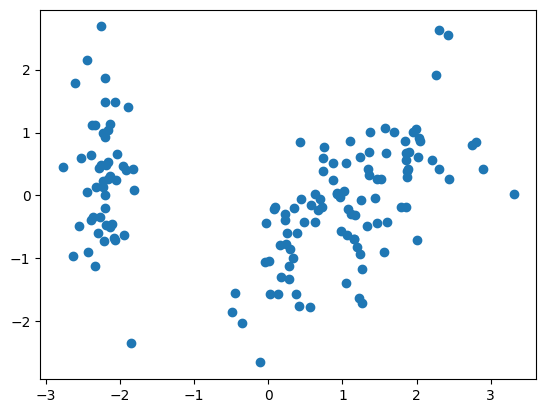

In [47]:
plt.scatter(pca_scaler[:,0],pca_scaler[:,1])

In [48]:
import scipy.cluster.hierarchy as sc  # linkage, dendrogram

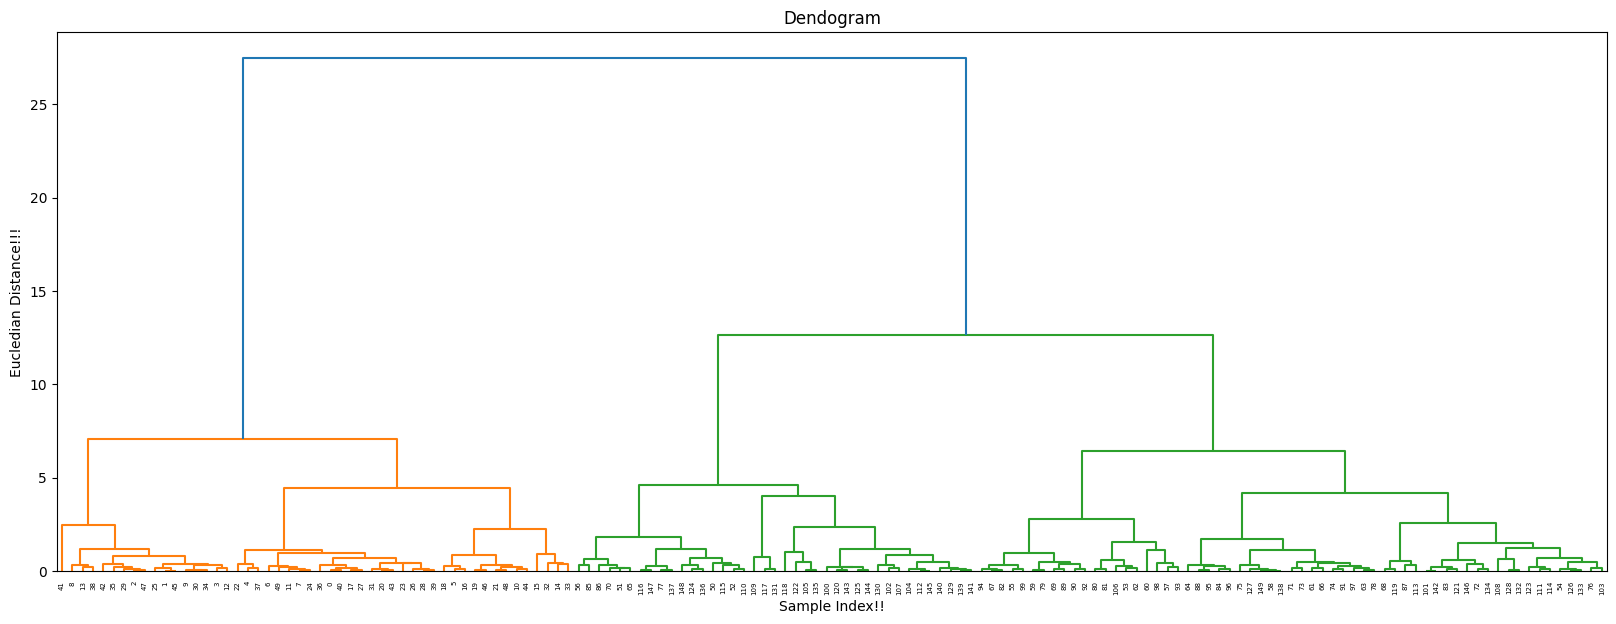

In [49]:
plt.figure(figsize=(20, 7))

plt.title('Dendograms:')

sc.dendrogram(sc.linkage(pca_scaler,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index!!')
plt.ylabel('Eucledian Distance!!!')
plt.show()

In [50]:
from sklearn.cluster import AgglomerativeClustering

In [51]:
# Fit hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=2,linkage='ward').fit(pca_scaler) # affinity='euclidean'

# Get cluster labels
labels = clustering.labels_

labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

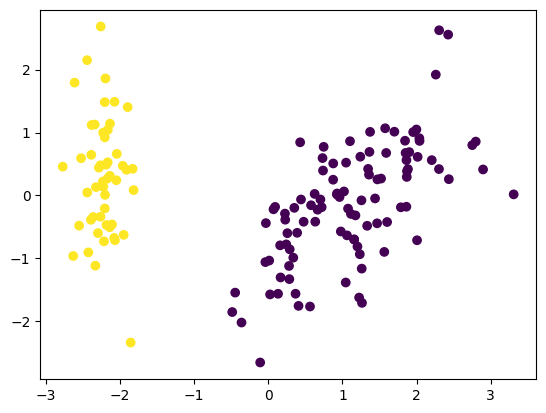

In [52]:
plt.scatter(pca_scaler[:,0],pca_scaler[:,1],c=labels)

In [53]:
from sklearn.metrics import silhouette_score,silhouette_samples

In [54]:
silhouette_coefficients =[]
for k in range(2,11):
    # Fit K-Means clustering
    agglo = KMeans(n_clusters=k, random_state=42,init='k-means++').fit(X_scaler)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaler, agglo.labels_)
    silhouette_coefficients.append(silhouette_avg)

In [55]:
silhouette_coefficients

[0.5817500491982808,
 0.4798814508199817,
 0.3850454053045392,
 0.34503345350274617,
 0.3339432304006177,
 0.2664290993719981,
 0.34162906041313373,
 0.32439914389835445,
 0.33540615043919825]

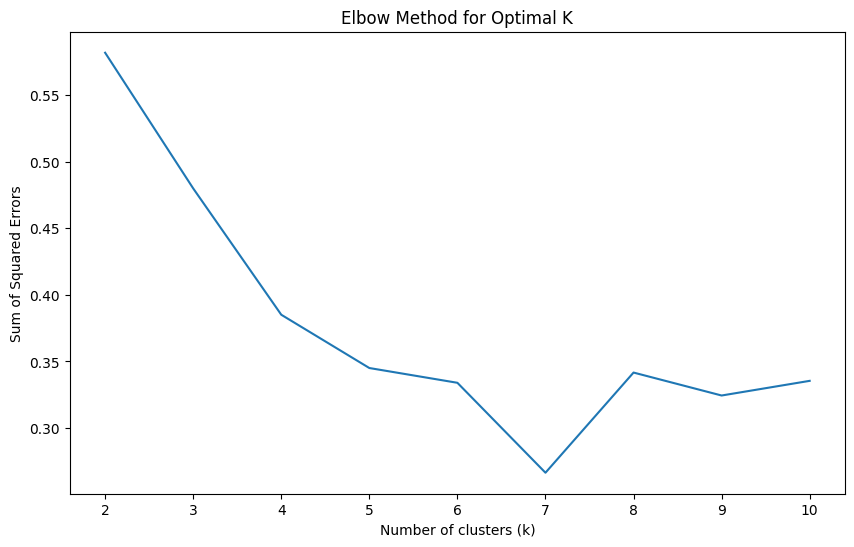

In [56]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors')
plt.title('Elbow Method for Optimal K')
plt.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [52.5, 52.5, 83.75, 83.75],
  [30.0, 30.0, 68.125, 68.125],
  [10.0, 10.0, 49.0625, 49.0625],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [162.5, 162.5, 190.0, 190.0],
  [130.0, 130.0, 176.25, 176.25],
  [29.53125, 29.53125, 153.125, 153.125],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [240.0, 240.0, 270.0, 270.0],
  [212.5, 212.5, 255.0, 255.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [335.0, 335.0, 345.0, 345.0],
  [375.0, 37

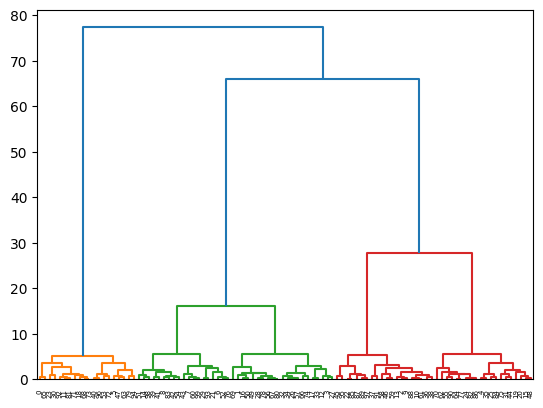

In [57]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=100, centers=5, random_state=42)

# Compute the linkage matrix
Z = linkage(X, 'ward')

# Plot the dendrogram
dendrogram(Z)

In [58]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=500, centers=4, random_state=42)

# Fit hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=4, linkage='ward').fit(X)

# Get cluster labels
labels = clustering.labels_

# Print the cluster labels
print(labels)

[1 0 2 3 0 0 1 0 2 0 2 3 2 3 0 2 3 1 1 3 2 3 2 1 1 0 0 1 1 3 0 3 3 3 0 0 2
 2 1 1 0 2 3 3 3 2 2 2 0 1 0 3 1 0 2 3 3 1 0 1 1 3 0 1 2 0 0 1 2 0 2 0 0 1
 3 1 3 0 2 3 0 2 0 3 1 1 1 1 2 3 1 0 2 0 2 1 3 2 3 1 2 2 2 1 1 3 3 1 3 1 0
 1 1 1 1 0 2 1 0 0 3 2 0 2 1 2 2 0 0 1 1 2 2 0 2 1 1 1 2 2 0 1 2 2 0 1 1 3
 3 3 0 0 2 2 3 1 3 1 0 0 1 1 2 2 0 3 2 0 1 1 0 3 3 1 1 3 3 0 0 0 3 1 3 3 1
 1 3 2 3 0 0 1 1 0 3 0 3 3 1 0 3 3 0 1 2 1 0 2 2 1 1 0 1 3 3 0 3 1 3 2 2 3
 1 3 2 3 3 0 0 2 0 2 3 0 1 0 3 0 2 2 2 0 3 2 1 1 2 3 3 0 3 3 3 3 2 2 1 3 0
 2 3 3 1 3 0 0 2 3 2 0 3 3 2 1 3 3 3 2 1 0 3 2 2 3 0 3 2 1 2 0 0 3 3 2 1 2
 1 2 0 2 0 1 2 2 3 2 0 0 2 2 0 1 2 2 2 0 1 2 2 2 1 2 2 1 1 1 0 1 1 1 1 1 3
 1 2 1 3 3 1 2 2 2 3 3 0 3 0 3 2 0 0 2 0 1 1 0 1 3 0 3 2 3 0 0 1 2 0 2 2 1
 3 0 2 0 1 2 1 2 1 1 0 1 3 0 1 0 3 0 1 0 1 2 3 3 0 0 2 3 3 3 2 1 0 3 2 2 0
 1 0 0 0 3 2 0 3 2 3 3 2 3 2 3 1 0 2 3 0 1 3 2 2 0 0 0 1 0 2 1 3 3 1 2 1 2
 3 0 0 0 3 2 2 1 3 0 0 0 2 0 3 2 1 2 0 2 3 2 3 2 0 3 1 1 3 3 1 1 3 0 2 0 2
 3 1 1 3 0 1 1 2 1 1 3 1 

In [59]:
from sklearn.cluster import DBSCAN

In [60]:
from sklearn.datasets import make_moons

In [61]:
X,y= make_moons(n_samples=250,noise=0.05)

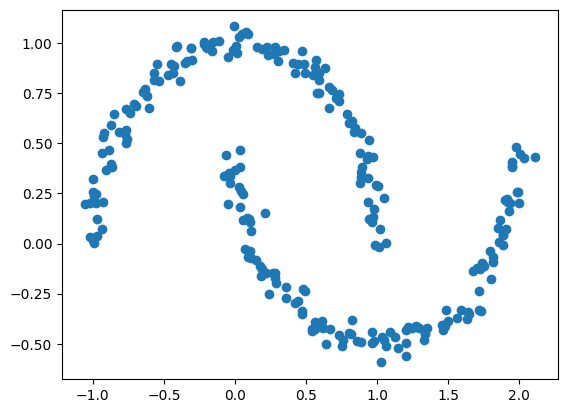

In [62]:
plt.scatter(X[:,0],X[:,1])

In [63]:
scaler = StandardScaler()


In [64]:
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-0.0158085 ,  1.29846145],
       [-0.44332141, -0.38277065],
       [ 0.35341088, -1.40638245],
       [ 0.51421306, -0.26219233],
       [-0.21628582,  1.434076  ],
       [-1.72234625, -0.02405036],
       [ 0.36933552, -1.42277676],
       [-1.57378328,  0.26144105],
       [ 1.56214889, -0.3469216 ],
       [-0.93257403,  1.46332215],
       [-0.5364497 , -0.14451557],
       [ 0.96896964, -1.41958325],
       [-1.05746066,  1.47010178],
       [ 0.33083537,  0.79564784],
       [ 0.18701029,  1.06935577],
       [ 0.96895978, -1.41184908],
       [-1.69650799, -0.26540537],
       [-0.22991663,  1.33002342],
       [-0.92553417,  1.34185936],
       [-0.25023773,  1.47030116],
       [ 0.98759629, -1.36126569],
       [ 0.83271395, -1.35126763],
       [-1.4655248 ,  0.63966513],
       [-1.19836312,  1.12551057],
       [-0.25881973,  1.40389808],
       [ 1.73918017,  0.39760891],
       [ 0.85894139, -1.35756186],
       [-0.54783447,  0.06374192],
       [ 0.09150738,

In [65]:
dbscan = DBSCAN(eps=0.5)

In [66]:
dbscan.fit(X_scaler)

DBSCAN()

In [67]:
dbscan.labels_

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

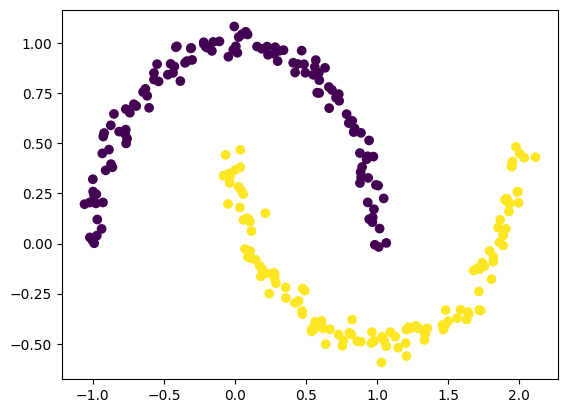

In [68]:
plt.scatter(X[:,0],X[:,1],c=dbscan.labels_)

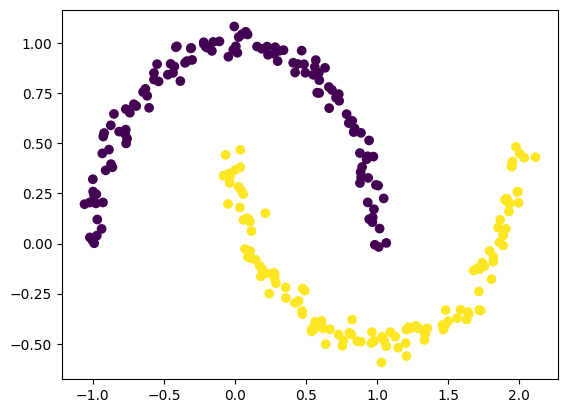

In [69]:
plt.scatter(X[:,0],X[:,1],c=y)